<a href="https://colab.research.google.com/github/patelmedha/Prediction-of-Product-Sales/blob/main/PREDICTION_OF_PRODCUT_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction of Product Sales**
Author: Medha Patel

##Project Overview

##Load and Inspect Data

Import Libraries

In [33]:
import pandas as pd
import numpy as np

### Load Data

In [34]:
#Load Data
file_url = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/PROJECT: PREDICTION OF PRODUCT SALES/Data/sales_predictions_2023.csv'

df = pd.read_csv(file_url)

###Inspect Data

####Head()

In [35]:
#Head()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


####shape()

In [36]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

There are 8523 rows, and 12 columns.


####dtypes

In [37]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

####Info()

In [38]:
#Info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


####describe()

In [39]:
#Descriptive statistics for numeric columns
df.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [40]:
#Descriptive statistics for categoric columns
df.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


##Clean Data

####Dropping/Replacing Columns

Outlet_Establishment_Year can be replaced with Outlet_Age.

In [41]:
df['Outlet_Establishment_Year'].min()

1985

In [42]:
#oldest store
oldest_store = df['Outlet_Establishment_Year'].min()
print(f'The oldest Outlet Store was built in the year {oldest_store}.')

#newest store
newest_store = df['Outlet_Establishment_Year'].max()
print(f'The newest Outlet Store was built in the year {newest_store}.')

The oldest Outlet Store was built in the year 1985.
The newest Outlet Store was built in the year 2009.


Add new column Outlet_Age

In [43]:
#Add a new column with Outlet_Age. This will make it easier to see how old/new a store is, and how it affects the sales. 
df['Outlet_Age'] = (newest_store+1) - df['Outlet_Establishment_Year']

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,11
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,11
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,12
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,23


Drop Out_Establishment_Year column

In [44]:
#drop Out_Establishment_Year
df = df.drop('Outlet_Establishment_Year', axis=1)


In [45]:
#check if column was dropped
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,11
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,11
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,12
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,23


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           7060 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           6113 non-null   object 
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
 11  Outlet_Age            8523 non-null   int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Oulet_Location_Type can be converted in numerical column

In [47]:
# Remove  the "Tier" from 'Outlet_Location_Type' column by replacing it with nothing
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].str.replace('Tier','')
# Check the .value_counts to confirm the change
df['Outlet_Location_Type'].value_counts()

 3    3350
 2    2785
 1    2388
Name: Outlet_Location_Type, dtype: int64

Checking for duplicates:

In [48]:
dup_rows = df.duplicated().sum()
print(f'There are {dup_rows} duplicate rows.')

There are 0 duplicate rows.


####Unique Values

In [49]:
df.nunique()

Item_Identifier         1559
Item_Weight              415
Item_Fat_Content           5
Item_Visibility         7880
Item_Type                 16
Item_MRP                5938
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
Item_Outlet_Sales       3493
Outlet_Age                 9
dtype: int64

In [50]:
#Unique Value percentage
unique_percentage = df.nunique()/len(df) * 100
unique_percentage

Item_Identifier         18.291681
Item_Weight              4.869178
Item_Fat_Content         0.058665
Item_Visibility         92.455708
Item_Type                0.187727
Item_MRP                69.670304
Outlet_Identifier        0.117330
Outlet_Size              0.035199
Outlet_Location_Type     0.035199
Outlet_Type              0.046932
Item_Outlet_Sales       40.983222
Outlet_Age               0.105597
dtype: float64

####Looking for Missing Values

In [51]:
missing_values = df.isna().sum()
missing_values

Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Age                 0
dtype: int64

In [52]:
#percent of missing_values
missing_values_percent = missing_values/len(df) * 100
missing_values_percent

Item_Identifier          0.000000
Item_Weight             17.165317
Item_Fat_Content         0.000000
Item_Visibility          0.000000
Item_Type                0.000000
Item_MRP                 0.000000
Outlet_Identifier        0.000000
Outlet_Size             28.276428
Outlet_Location_Type     0.000000
Outlet_Type              0.000000
Item_Outlet_Sales        0.000000
Outlet_Age               0.000000
dtype: float64

####Visualizing Missing Values with Missingno

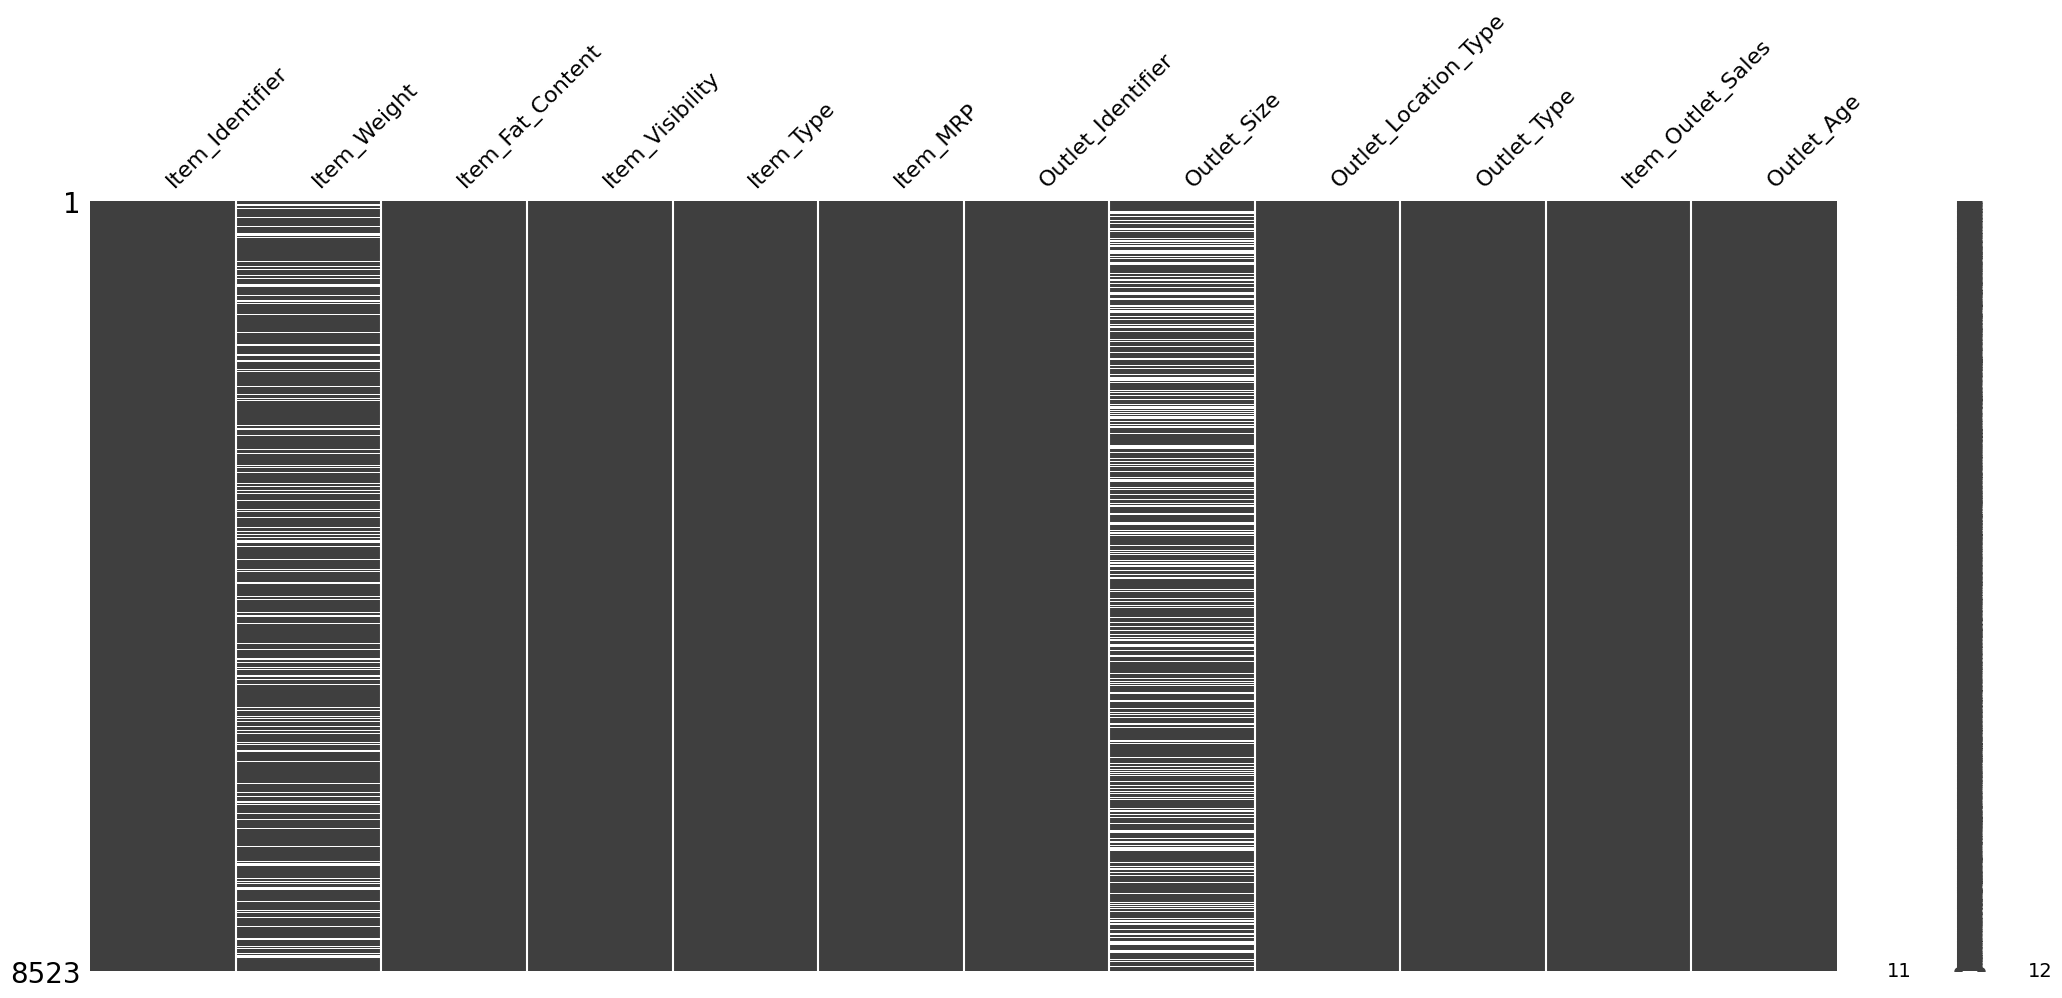

In [53]:
import missingno as msno
msno.matrix(df);

In [54]:
# save list of categorical column name.
categorical_col = df.select_dtypes('object').columns
categorical_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Majority of the Grocery Store Outlet_Size.

Replace the Nan Values for Grocery Store 'Outlet_Size' with Small


In [55]:
# use the list of cat columns to fill null values with Small
df['Outlet_Size'] = df['Outlet_Size'].groupby[['Outlet_Location_Type': 'Grocery Store']].fillna('Small')

SyntaxError: ignored

##Exploratory Data Analysis

##Explanatory Data Analysis